%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')

# Métodos frecuentistas

En este capítulo veremos como realizar inferencias estadísticas mediante uno los paradigmas estadísticos más usados. Los métodos frecuentistas.

## Valores p y prueba de hipotesis nula

Supongamos que tiramos al aire 20 veces una misma moneda y observamos 7 caras y 13 cecas.

* ¿Cuán _esperable_ es este resultado para una moneda que _debería_ caer la mitad de las veces cara?
* ¿Es realmente _diferente_ este resultado de 10 caras y 10 cecas?
* ¿Cual es la probabilidad que nuestra moneda esté sesgada?

Existen esencialmente dos formas de dar respuesta a este tipo de preguntas. La forma frecuentista y la Bayesiana. En este capítulo veremos la forma frecuentista (y en el próximo la Bayesiana). 

La estrategia frecuentista consiste en __________________. Y en este capítulo veremos casos concretos de esto....

Dentro del frecuentismo existen dos grandes estrategias:

* Las pruebas de hipótesis nula
* La estimación de una cantidad/efecto junto con la determinación de la incertidumbre

La primera de estas estrategias es la que tradicionalmente se ha enseñado y divulgado con más énfasis. La segunda estrategia se la ha llamado "[nueva estadística](https://www.amazon.com/Understanding-New-Statistics-Meta-Analysis-Multivariate/dp/041587968X)" (aunque las ideas no son realmente nuevas) y está tomando más fuerza. Personalmente considero que esto es un avance aunque como [otros](http://doingbayesiandataanalysis.blogspot.co.at/2015/05/the-bayesian-new-statistics-two.html) considero que en general la estadística Bayesiana es una mejor idea. 

Empecemos por la prueba de hipótesis nula. La idea es la siguiente.

* Se asume que los datos se generaron según una hipótesis nula
* Se calcula la probabilidad de observar los datos, o en general un estadístico derivado de estos datos que sea igual o más extremo que el observado. A esto se le llama *valor p*.
* Si el *valor p* está por debajo de un valor predefinido ($\alpha$), es decir si la probabilidad de observar los datos es _pequeña_ dada la hipótesis nula entonces se _rechaza la hipótesis nula_. Si en cambio el *valor p* está por encima de ese valor predefinido se _falla en rechazar la hipótesis nula_.

Un par de cosas a notar son que:

* Bajo el paradigma frecuentista no es posible aceptar una hipótesis nula.
* El computo del *valor p* asume que $H_{0}$ es cierta. Por lo tanto el *valor p* NO es la probabilidad que $H_{0}$ sea cierta, tampoco es la probabilidad de $no H_0$ (la alternativa) sea cierta, ni siquiera es $p(D | H_0)$.
* Bajo el paradigma frecuentista no es posible preguntarse sobre la probabilidad de un parámetro tome tal o cual valor. Los parámetros tienen valores fijos (aunque desconocidos). Por lo tanto NO podemos responder a la pregunta ¿Cuál es la probabilidad que nuestra moneda esté sesgada?

Ahora que conocemos el modo de pensar frecuentista veamos como aplicarlo para resolver el problema de la moneda.

Este problema puede ser resuelto de forma analítica, basta aplicar la distribución binomial ¿Por qué esta distribución? Precisamente por que modela eventos que tienen dos posibles resultados, cara-ceca, si-no, apagado-prendido, sano-enfermo, etc. La distribución binomial la vimos en el capítulo anterior y tiene la siguiente forma:  

$$p(x|n,p) = {\binom {n}{k}}p^x(1-p)^{n-x}$$


(este es un buen momento para  volver al capítulo anterior y revisar _como es_ esta distribución)


A continuación vamos a generar los datos con Python, _como si_ hubiéramos arrojado la moneda 20 veces y hubiéramos observado 7 caras. Vamos a usar el número 1 para representar caras y el 0 para representar cecas. Manipular números es mucho más simple que manipular _strings_.

In [42]:
monedas_obs = [1] * 7 + [0] * 13
# una forma alternativa a la linea de arriba, pero usando NumPy
# monedas_obs = np.repeat((1, 0), (7, 13)) 
len(monedas_obs), sum(monedas_obs)

(20, 7)

Según el paradigma frecuentista el procedimiento sería:

1. Vamos a asumir que la moneda tiene la misma chance de caer cara (1) o ceca (0), p = 0.5
2. Vamos a lanzar una moneda 20 veces (igual que en nuestros datos), n = 20
3. Dados los puntos 1 y 2 y asumiendo que la moneda sigue una distribución binomial (con n=20, p =0.5) vamos a calcular la probabilidad de obtener 7 o menos caras. Esto es el *valor p*.


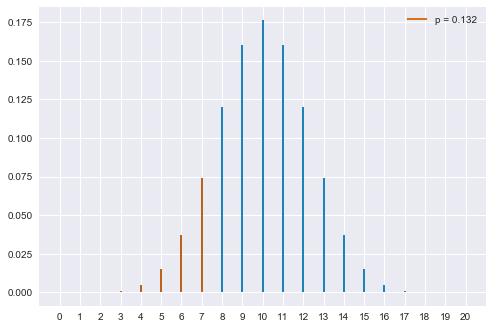

In [136]:
n = 20   # cantidad de veces que arrojamos la moneda en el experimento
p = 0.5  # si H0 entonces p=0.5 (igual proporción de caras y cecas)
caras_obs = sum(monedas_obs) 
dist_monedas = stats.binom(n, p);
x = np.arange(0, n + 1)
y = dist_monedas.pmf(x)
valor_p = sum(y[:caras_obs+1])
plt.vlines(x, 0, y, 'C0')
plt.vlines(x[:caras_obs+1], 0, y[:caras_obs+1], 'C2',
           label='p = {:.3f}'.format(valor_p))
plt.legend()
plt.xticks(x);

Recapitulemos lo que acabamos de hacer en el ejemplo anterior es calcular la probabilidad de obtener 0, 1, ... 20 caras (barras azules) y luego calcular la probabilidad de obtener 7 o menos caras (barras naranja).

Como se interpreta esta probabilidad? Bueno, desde el punto de vista frecuentista las probabilidades viven en _asintópia_, son frecuencias que se obtienen en el límite de infinitas repeticiones de un mismo experimento. Entonces la interpretación sería:

    Si arrojaramos 20 veces al aire una moneda NO SESGADA y esto lo repetimos infinitas veces entonces el 13.2 % de las veces obtendremos 7 o menos caras. 

Esto responde a la pregunta ¿Cuán _esperable_ es este resultado para una moneda que _debería_ caer la mitad de las veces cara?

Para intentar responder a la pregunta ¿Es realmente _diferente_ este resultado de 10 caras y 10 cecas? Es común usar el concepto de significancia estadística, que consiste en comparar el valor p con un valor predeterminado, llamado $\alpha$, este valor se suele fijar en 0.05 o en 0.001. Y se suele decir:

* Si p < 0.05, entonces la diferencia es estadísticamente significativa
* Si p < 0.001, entonces la diferencia es estadísticamente altamente-significativa

En este caso como p > 0.05 diríamos: "Se falla en rechazar la hipótesis nula con un p=0.132 y un nivel de significancia de 0.05".

Si esto suena a rito umbanda es por que algo de eso hay! ¿De donde salen esos números? La verdad es que son arbritrarios y son casi consecuencia de accidentes históricos. Lamentablemente se ha vuelto muy común que estos límites se utilicen para definir si resultados son publicables o no. El límite dependerá de la revista/disciplina, siendo 0.05 común por ej en psicología y en varias ramas de la biología.

Esta aproximación tiene varios problemas

1. Impone una forma de pensar dicotómica, que suele ser inapropiada en la mayoría de los estudios científicos.
2. Los *valor p* omiten muchos factores, información previa, nivel de precisión/incerteza de la estimación.
3. Un efecto estadísticamente significativo no tiene por que ser un efecto relevante.
4. En general los *valores p* son interpretados erroneamente. Un trabajo mostró que solo el 62% de los encuestados fue capaz de contestar de forma correcta sobre la definición de los *valores p*. Lo interesante es que en realidad ninguna de las respuestas provistas en este estudio correspondía a una definición correcta de los _valores p_! Los *valores p* NO son:
    * La probabilidad de que $H_0$ sea cierta
    * La probabilidad de que $ no H_0$ falsa
    * La probabilidad de cometer un error al rechazar $H_0$
    * La probabilidad de que los datos observados se hayan dado por *azar*
    * Una forma de indicar que NO hay efecto si p > 0.5 (o el nivel que sea)
    * Una medida de la *relevancia* de un efecto.
    

Gran parte de los problemas rerivados de los *valores p*, provienen de usarlos como parte de la maquinaria de "prueba de hipótesis nula". La otra parte proviene quizá de que los *valores p* no derivan de un sistema formal de cálculo de probabilidades si no que fueron introducidos de forma totalmente *ad hoc*. Como veremos más adelante la Estadística Bayesiana provee de algo llamado factores de Bayes que curiosamente es todo lo que usted siempre quiso que un *valor p* fuera, pero que el *valor p* NO puede ser.

Una forma de usar los *valores p* sin meter la pata es no pedirle que ofrezcan la información que no pueden ofrecer. Un *valor p* debería ser usado con el fin que originalmente se postuló: Una forma aproximada, cuando se cuenta con poca información sobre un problema, para intentar estimar (de forma objetiva) si vale la pena seguir mirando los datos o haciendo experimentos a fin de replciar resultados. Entonces en general valores "bajos" de los *valores p* indicarían que es posible que tengamos algo interesante. Por ejemplo algunos autores recomiendan de forma muuuy general interpretar los *valores p* de la siguiente manera 

* p < 0.01 Hey parece que tenemos algo!
* p > 0.1 humm al parecer no hay mucho que decir
* 0.01 < p < 0.1 La vida rara vez nos ofrece respuestas claras!

 
De las tres preguntas que nos formulamos al inicio de este capítulo todavía nos queda una por contestar. 

* ¿Cuál es la probabilidad que nuestra moneda esté sesgada?

Para poder responder a esta pregunta esnecesario de forma oibligatoria el enfoque Bayesiano (o de usar el enfoque frecuentista pero pretender que se está usando el Bayesiano y esperar que nadie lo note o al menos que nadie diga nada, esto es una situación muuuuy común).

## Maxima verosimilitud e intervalos de  confianza

## Métodos de remuestreo

Ahora que hemos visto como computar analíticamente los *valores p*, estimaciones por máxima verosimilitud e intervalos de confianza. Veamos como resolver problemas de forma equivalente pero usando métodos de remuestreo, es decir simulaciones, en vez de aproximaciones analíticas.

### Valores p por simulación

Supongamos que son un poco escépticos sobre el uso de la distribución binomial, para resolver estre problema. Una alternativa al cálculo analítico que acabamos de hacer es usar Python para simular que arrojamos nonedas al aire!

1. Vamos a asumir que la moneda tiene la misma chance de caer cara (1) o ceca (0)
2. Vamos a lanzar una moneda 20 veces (igual que en nuestros datos)
3. Vamos a repetir el punto 2, una gran catidad de veces (por ej 10000 más o menos)
4. Vamos a contar todas las veces que obtengamos 7 o menos caras.

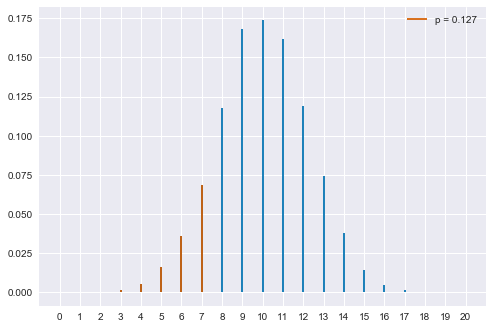

In [138]:
n = len(monedas_obs)
caras_sim_l = []
ite = 10000
for i in range(0, ite):
    monedas_sim = np.random.randint(0, 2, size=n)
    caras_sim = sum(monedas_sim)
    caras_sim_l.append(caras_sim)
x = np.arange(0, n + 1)
y = np.histogram(caras_sim_l, np.arange(0, n+1), normed=True)[0]
# como y está normalizado, esta linea es una probabilidad
valor_p = sum(y[:caras_obs+1])
plt.vlines(x, 0, y, 'C0')
plt.vlines(x[:caras_obs+1], 0, y[:caras_obs+1], 'C2',
           label='p = {:.3f}'.format(valor_p))
plt.legend()
plt.xticks(x);

### reshufling

### bootstrapping

y si pongo  un ejemplo acá de regresión lineal???? puede que se interesante